In [1]:
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2 
import skimage
import scipy

from scipy import ndimage
from sklearn.cluster import MeanShift, estimate_bandwidth

### Фильтр Гаусса

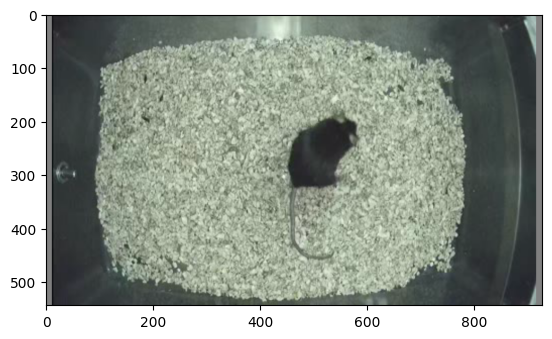

In [2]:
pic = PIL.Image.open('mouse.bmp')
sigma = 10
pix = np.array(pic)
result = ndimage.gaussian_filter(pix, sigma)
PIL_image = PIL.Image.fromarray(np.uint8(result)).convert('L')
plt.imshow(pic)
plt.show()

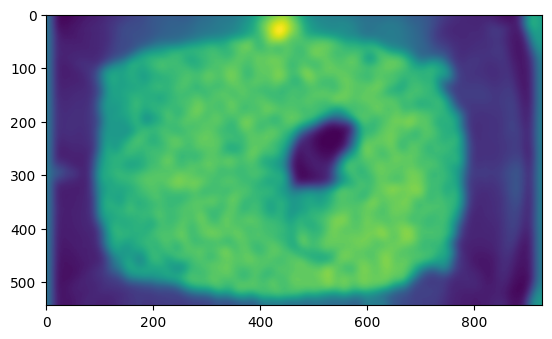

In [3]:
plt.imshow(PIL_image)
plt.show()

### Фильтр Робертса

('R', 'G', 'B')
('L',)


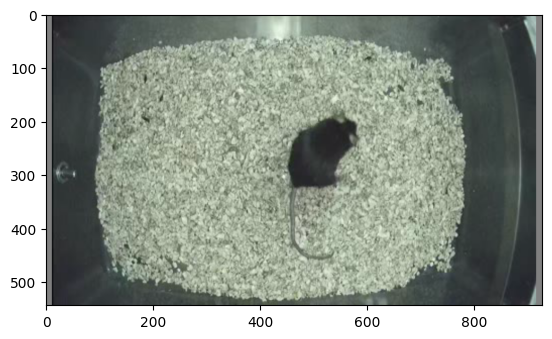

In [4]:
roberts_cross_v = np.array([[1, 0 ],
                            [0,-1 ]])
roberts_cross_h = np.array([[ 0, 1 ],
                            [ -1, 0 ]])

with PIL.Image.open('mouse.bmp') as pix:
    pix.load()
 
plt.imshow(pix)
b = pix.getbands()
print(b)

pix = pix.convert("L")
 
b = pix.getbands()
print(b)

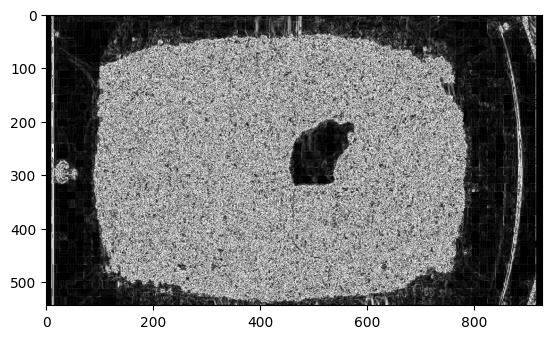

In [5]:
vertical = ndimage.convolve(pix, roberts_cross_v)
horizontal = ndimage.convolve(pix, roberts_cross_h)
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))

 
PIL_image = PIL.Image.fromarray(np.uint8(edged_img))

plt.imshow(PIL_image,cmap=plt.cm.gray)
plt.show()

### Фильтр Прюитт

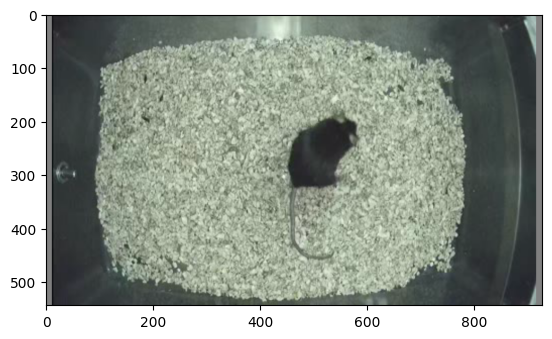

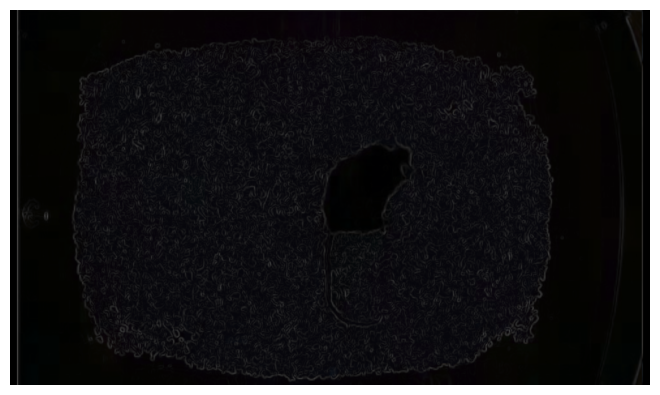

In [6]:
pic = PIL.Image.open('mouse.bmp')
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.prewitt(pix)

plt.imshow(pic, cmap=plt.cm.gray, aspect='equal')
plt.show()

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(result, cmap=plt.cm.gray, aspect='equal')
plt.show()

### Фильтр Собеля

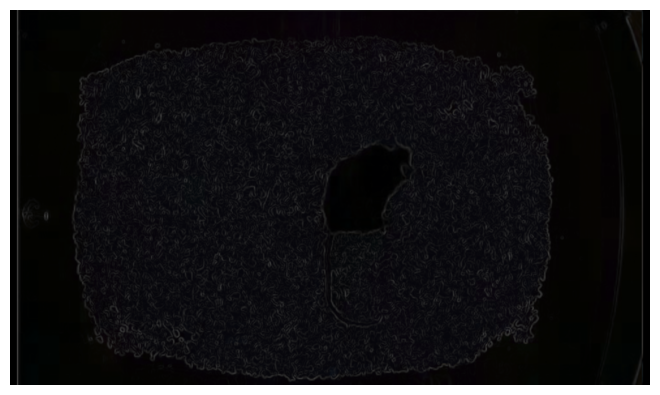

In [7]:
pic = PIL.Image.open('mouse.bmp')
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.sobel(pix)
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(result, cmap=plt.cm.gray, aspect='equal', interpolation="mitchell")
plt.show()

### Фильтр Лапласа

In [8]:
def LoG_filter(image, sigma, size=None):
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(- size // 2 + 1, size // 2 + 1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = ndimage.convolve(image, kernel)
    return result

image = cv2.imread('mouse.bmp', cv2.IMREAD_GRAYSCALE)
sigma = 2.0
filtered_image = LoG_filter(image, sigma)

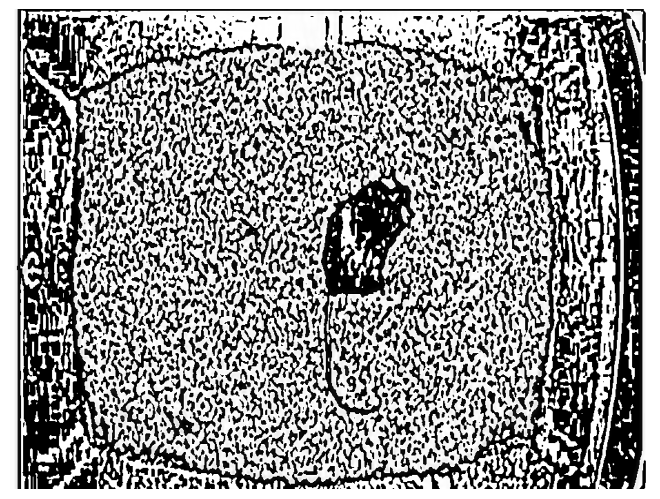

In [9]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(filtered_image, cmap=plt.cm.gray, aspect='auto')
plt.show()

### Выделение областей

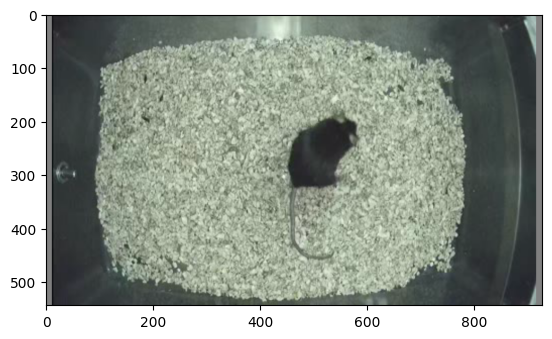

In [10]:
image = PIL.Image.open('mouse.bmp').convert('RGB')

plt.imshow(image, cmap=plt.cm.gray, aspect='equal')
plt.show()

img = np.array(image)
shape = img.shape
new_shape = shape[1], shape[0]
reshaped_image = np.reshape(image, [-1, 3])
bandwidth = estimate_bandwidth(reshaped_image, quantile=0.1, n_samples=300)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshaped_image)

labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

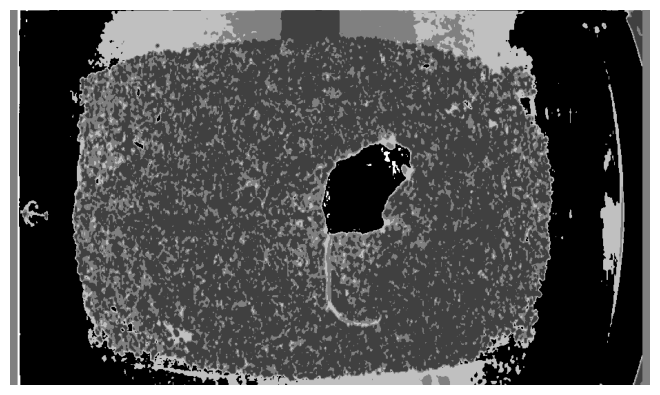

In [11]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(result_image, cmap=plt.cm.gray, aspect='equal')
plt.show()

### Floodfill

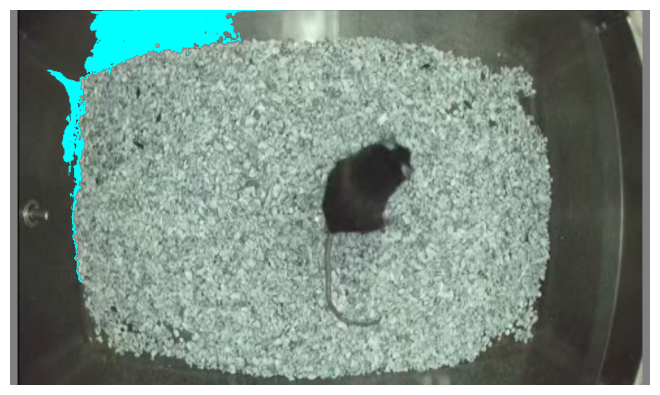

In [12]:
img = cv2.imread('mouse.bmp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

copyimg = img.copy()
h, w = copyimg.shape[:2]
mask = np.zeros([h + 2, w + 2], np.uint8)

cv2.floodFill(copyimg, mask, (165,60), (0, 255, 255), (50, 20, 50), (50, 50 ,30), cv2.FLOODFILL_FIXED_RANGE)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(copyimg)
plt.show()

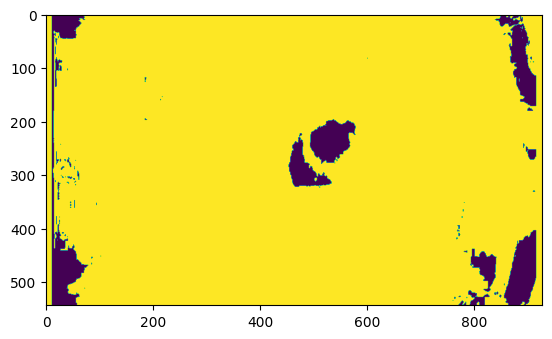

In [13]:
image = cv2.imread('mouse.bmp')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lower_bound = 50
upper_bound = 50

(thresh, BnW_image) = cv2.threshold(gray_image, lower_bound, upper_bound, cv2.THRESH_BINARY)
im = PIL.Image.fromarray(BnW_image)
plt.imshow(im)
plt.show()

# Зашумление и удаление шумов

### Гауссов шумов

In [14]:
img = cv2.imread('mouse.bmp')
img_gray = img[:,:,1]
noise = np.random.normal(0, 50, img_gray.shape) 
img_noised = img_gray + noise
img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)

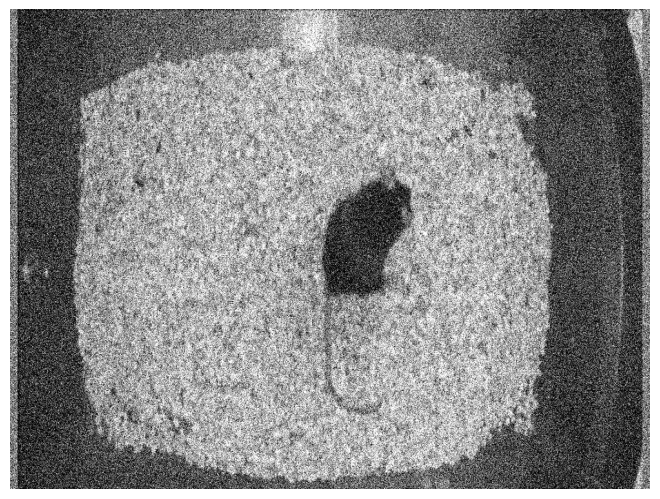

In [15]:
gauss_noise_test = img_noised
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("gauss_noise_test.jpg", dpi=300)
plt.show()

### Импульсный шум

In [16]:
x = np.arange(0, 360, 1)
y = np.sin(np.deg2rad(x))

noise_sample = np.random.default_rng().uniform(0.2*min(y), 0.3*max(y), int(0.03*len(y)))
zeros = np.zeros(len(y) - len(noise_sample))
noise = np.concatenate([noise_sample, zeros])
np.random.shuffle(noise)
y_noised = y + noise

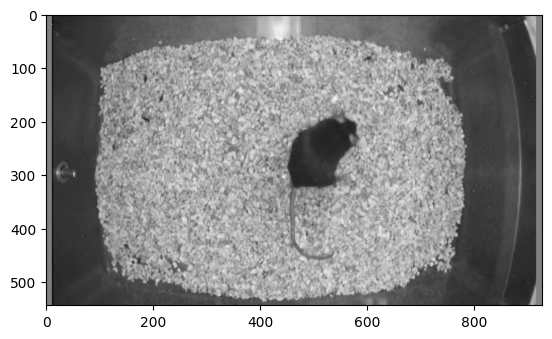

In [17]:
image = cv2.imread('mouse.bmp')
 
h, w = image.shape[:2]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

s = 300

noise_sample = np.random.default_rng().uniform(low=200, high=250, size=s)
 
rs1 = np.random.randint(0,gray.size/h-1,s)
rs2 = np.random.randint(0,gray.size/w-1,s)

j = 0

for i in noise_sample:
    gray[rs2[j]][rs1[j]] += i
    j += 1

plt.imshow(gray, cmap=plt.cm.gray, aspect='equal')
plt.savefig("impulse_noise.jpg", dpi=300)
plt.show()

### Salt-and-Pepper

In [18]:
img_size = img_gray.size
noise_percentage = 0.1
noise_size = int(noise_percentage*img_size)

random_indices = np.random.choice(img_size, noise_size)
img_noised = img_gray.copy()
noise = np.random.choice([img_gray.min(), img_gray.max()], noise_size)
img_noised.flat[random_indices] = noise

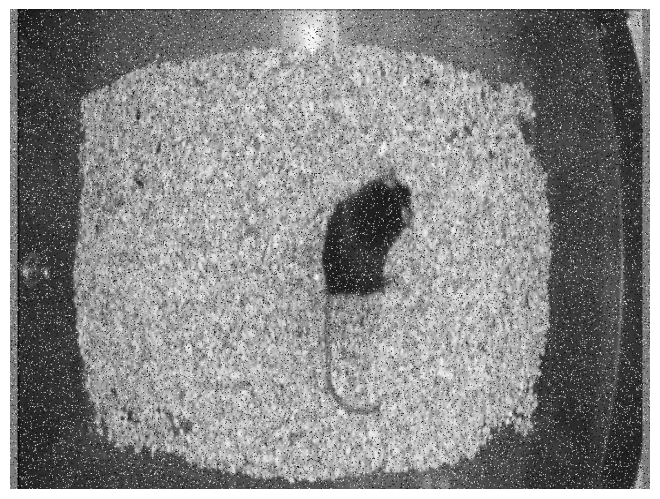

In [19]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("saltnpepper_noise.jpg", dpi=300)
plt.show()

### Удаление шума из изображения

In [20]:
img = cv2.imread('gauss_noise_test.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 25)

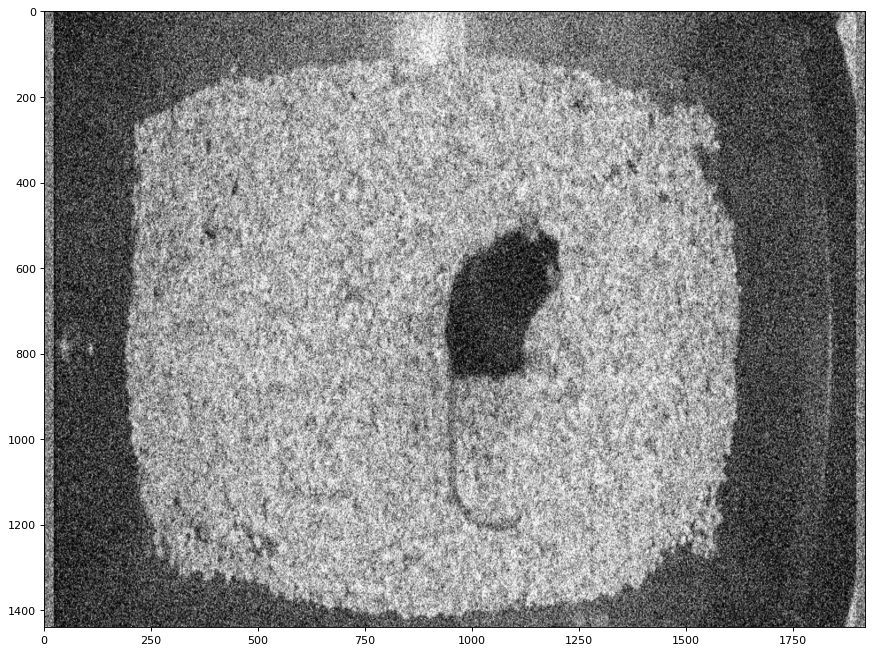

In [21]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(img)
plt.show()

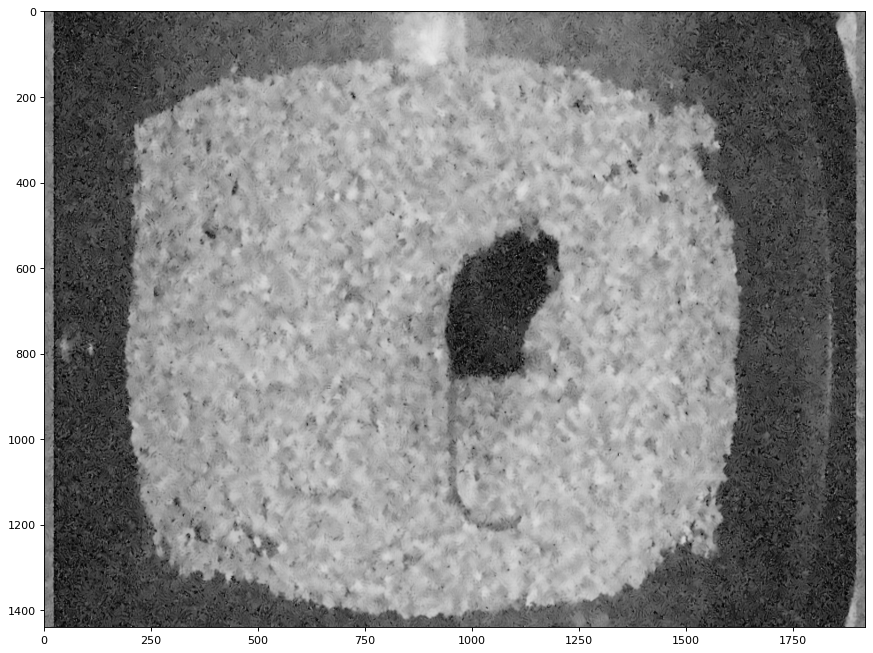

In [22]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(dst)
plt.show()

In [23]:
img = cv2.imread('impulse_noise.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 15, 10, 7, 21)

<Figure size 1200x1200 with 0 Axes>

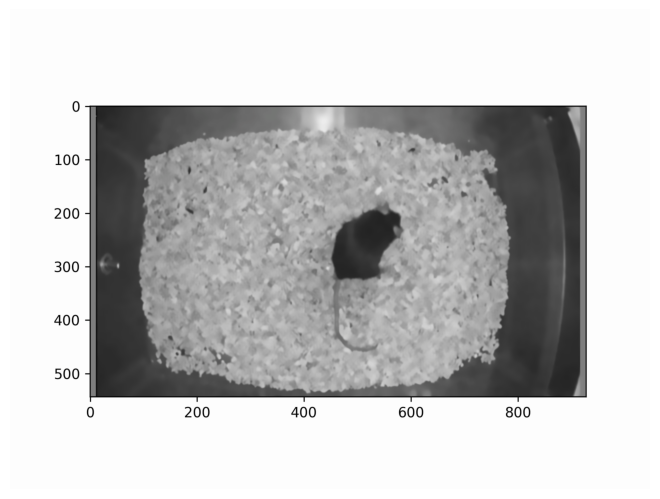

In [24]:
plt.figure(figsize=(12, 12))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(dst[...,::-1] / 255.0, aspect='auto')
plt.savefig("impulse_noise.jpg", dpi=300)
plt.show()

In [25]:
import tensorflow
import torch
import os
import pandas as pd
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
import torch.nn as nn
import torchvision.models as models
import numpy as np
from tqdm import tqdm
import random
from tensorflow import keras

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensorflow.device(device)
print(device)

cuda:0


In [27]:
classes = os.listdir(os.path.abspath('../../dataset'))

In [28]:
print(classes)
print(len(classes))

['adho mukha svanasana', 'adho mukha vriksasana', 'agnistambhasana', 'ananda balasana', 'anantasana', 'anjaneyasana', 'ardha bhekasana', 'ardha chandrasana', 'ardha matsyendrasana', 'ardha pincha mayurasana', 'ardha uttanasana', 'ashtanga namaskara', 'astavakrasana', 'baddha konasana', 'bakasana', 'balasana', 'bhairavasana', 'bharadvajasana i', 'bhekasana', 'bhujangasana', 'bhujapidasana', 'bitilasana', 'camatkarasana', 'chakravakasana', 'chaturanga dandasana', 'dandasana', 'dhanurasana', 'durvasasana', 'dwi pada viparita dandasana', 'eka pada koundinyanasana i', 'eka pada koundinyanasana ii', 'eka pada rajakapotasana', 'eka pada rajakapotasana ii', 'ganda bherundasana', 'garbha pindasana', 'garudasana', 'gomukhasana', 'halasana', 'hanumanasana', 'janu sirsasana', 'kapotasana', 'krounchasana', 'kurmasana', 'lolasana', 'makara adho mukha svanasana', 'makarasana', 'malasana', 'marichyasana i', 'marichyasana iii', 'marjaryasana', 'matsyasana', 'mayurasana', 'natarajasana', 'padangusthasan

In [29]:
train_images = []
test_images = []
val_images = []

test_size = 0.2

In [30]:
compose = transforms.Compose([transforms.PILToTensor()])
compose_to = 128

In [31]:
for j in range(len(classes)):
    cl = classes[j]
    img_names = os.listdir(os.path.abspath('../../dataset') + '\\' + cl)
    for i in range(len(img_names)):
        name = img_names[i]
        tmp = Image.open(os.path.abspath('../../dataset') + '\\' + cl + '\\' + name)
        tmp = tmp.convert("RGB")
        tmp = tmp.resize((compose_to, compose_to))
        img = tmp.copy()
        if i < int(len(img_names) * (1 - test_size)):
            if i < int(len(img_names) * (1 - test_size) * (1 - test_size)):
                train_images.append([img, j])
            else:
                test_images.append([img, j])
        else:
            val_images.append([img, j])
        tmp.close()


c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [32]:
print(len(train_images) + len(test_images) + len(val_images))

5994


In [33]:
for i in range(len(train_images)):
    train_images[i] = (compose(train_images[i][0]), train_images[i][1])

for i in range(len(test_images)):
    test_images[i] = (compose(test_images[i][0]), test_images[i][1])

for i in range(len(val_images)):
    val_images[i] = (compose(val_images[i][0]), val_images[i][1])

In [34]:
import random

random.shuffle(train_images)

In [35]:
train_dataset = pd.DataFrame(train_images)
test_dataset = pd.DataFrame(test_images)
val_dataset = pd.DataFrame(val_images)

train_dataset.tail()

0   1
3781  [[[tensor(128, dtype=torch.uint8), tensor(127,...  34
3782  [[[tensor(0, dtype=torch.uint8), tensor(0, dty...  35
3783  [[[tensor(237, dtype=torch.uint8), tensor(242,...  48
3784  [[[tensor(231, dtype=torch.uint8), tensor(231,...  71
3785  [[[tensor(255, dtype=torch.uint8), tensor(255,...  64

In [36]:
batch_size = 32
epochs = 200
data_augmentation = True
num_classes = len(classes)
lr = 1e-04

subtract_pixel_mean = True
n = 3

depth = n * 9 + 2

model_type = f'ResNet {depth}'

train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size, shuffle=True,
        num_workers=4, pin_memory=True)

val_loader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=128, shuffle=False,
        num_workers=4, pin_memory=True)

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

virabhadrasana i   camatkarasana    krounchasana adho mukha svanasana       sukhasana paripurna navasana supta baddha konasana        balasana


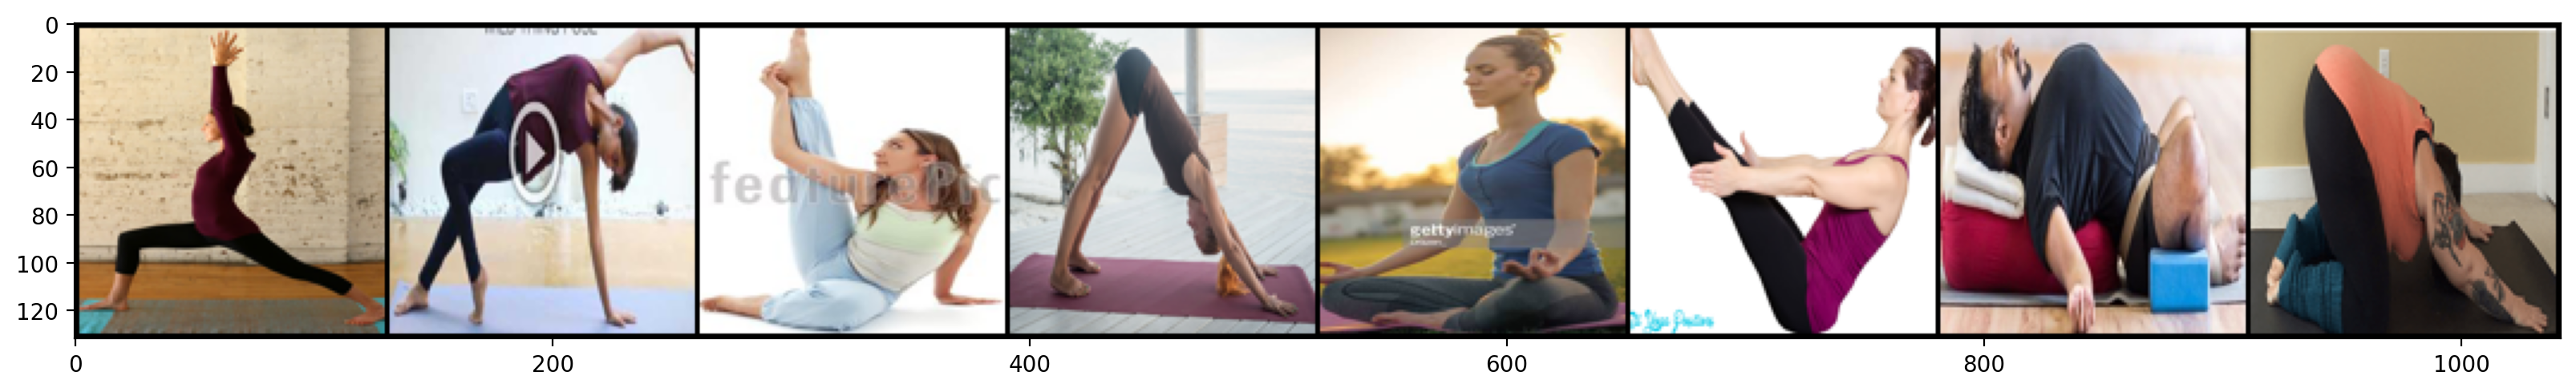

In [38]:
images, labels = list(train_dataset[0].to_numpy()), train_dataset[1].to_numpy()
plt.figure(figsize=(20,10)) 

imshow(torchvision.utils.make_grid(images[:8]))

print(' '.join('%15s' % classes[labels[j]] for j in range(8)))

In [39]:
train_data, test_data = torch.utils.data.random_split(train_loader.dataset, [0.8,  0.2])

In [40]:
def split_to_x_y(dataset):
    x_ = []
    y_ = []
    for i in range (len(dataset)):
        x_.append(torch.transpose(dataset[i][0], 0, 2))
        y_.append(dataset[i][1])
    return x_, y_  

In [41]:
x_train, y_train = split_to_x_y(train_dataset.to_numpy())
x_test, y_test =  split_to_x_y(test_dataset.to_numpy())

In [42]:
def to_numpy(data):
    data_ = []

    for i in range(len(data)):
        data_ += [np.array(data[i])]
    return np.array(data_)

In [43]:
Xtrain = to_numpy(x_train)
Ytrain = to_numpy(y_train)
Xtest = to_numpy(x_test)
Ytest = to_numpy(y_test)

In [44]:
Ytrain = keras.utils.to_categorical(Ytrain, 107)
Ytest = keras.utils.to_categorical(Ytest, 107)

In [45]:
inputs = keras.Input(shape=(compose_to, compose_to, 3), name="img")

x = keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = keras.layers.MaxPooling2D(3)(x)

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = keras.layers.add([x, block_1_output])

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = keras.layers.add([x, block_2_output])

x = keras.layers.Conv2D(128, 3, activation="relu")(block_3_output)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(107, activation='softmax')(x)
model = keras.Model(inputs, outputs, name="toy_resnet")

In [46]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
with tensorflow.device('/device:GPU:0'):
    model.fit(Xtrain, Ytrain, batch_size=16, epochs=40, validation_split=0.2)

Epoch 1/40
190/190 [==============================] - 2s 12ms/step - loss: 0.8170 - accuracy: 0.7378 - val_loss: 3.8505 - val_accuracy: 0.3179
Epoch 2/40
190/190 [==============================] - 2s 12ms/step - loss: 0.8429 - accuracy: 0.7302 - val_loss: 4.0186 - val_accuracy: 0.3061
Epoch 3/40
190/190 [==============================] - 2s 12ms/step - loss: 0.8246 - accuracy: 0.7404 - val_loss: 4.0772 - val_accuracy: 0.3206
Epoch 4/40
190/190 [==============================] - 2s 12ms/step - loss: 0.7597 - accuracy: 0.7589 - val_loss: 4.0122 - val_accuracy: 0.3285
Epoch 5/40
190/190 [==============================] - 2s 12ms/step - loss: 0.7183 - accuracy: 0.7777 - val_loss: 4.3925 - val_accuracy: 0.3127
Epoch 6/40
190/190 [==============================] - 2s 12ms/step - loss: 0.6765 - accuracy: 0.7876 - val_loss: 4.7170 - val_accuracy: 0.3206
Epoch 7/40
190/190 [==============================] - 2s 12ms/step - loss: 0.6309 - accuracy: 0.7923 - val_loss: 4.3652 - val_accuracy: 0.3232

In [48]:
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [49]:
print(model.evaluate(Xtest, Ytest))

31/31 [==============================] - 0s 9ms/step - loss: 3.8654 - accuracy: 0.3102
[3.8653688430786133, 0.310237854719162]


1/1 [==============================] - 0s 158ms/step
0 0
предсказанный класс adho mukha svanasana, реальный класс adho mukha svanasana


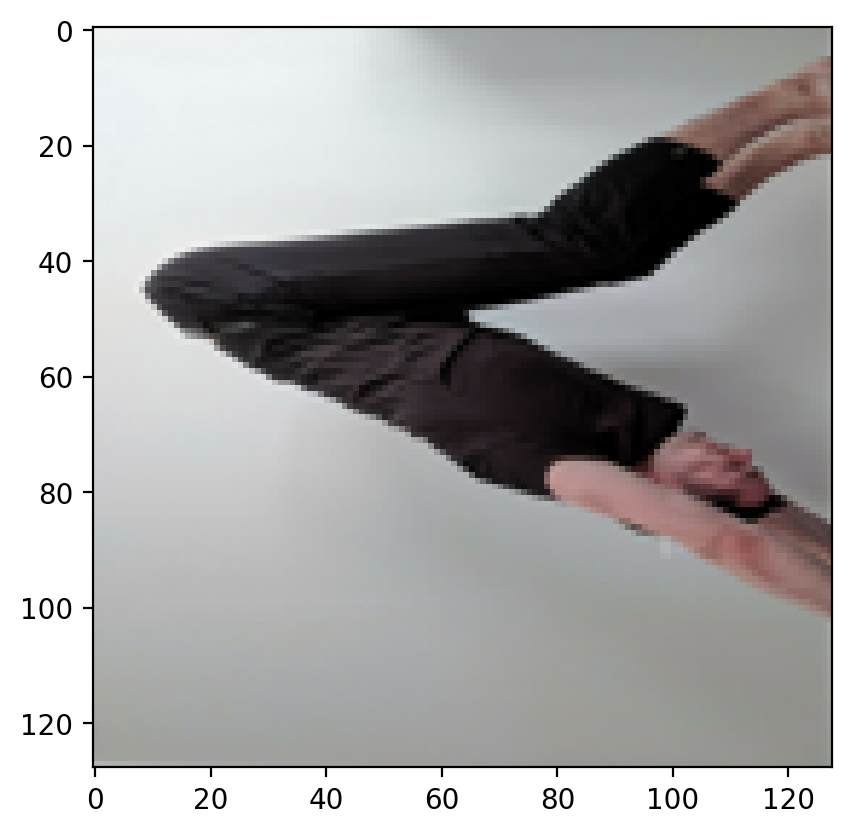

In [50]:
ind = 2
preds = model.predict(np.expand_dims(Xtest[ind], axis=0))[0]

pred_class = max(enumerate(preds),key=lambda x: x[1])[0]
real_class = max(enumerate(Ytest[ind]),key=lambda x: x[1])[0]
print(pred_class, real_class)
plt.imshow(Xtest[ind])
print(f"предсказанный класс {classes[pred_class]}, реальный класс {classes[real_class]}")